In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载数据
data = pd.read_feather('../features1.feather')
X = data.iloc[:, 1:103]  # x1 ~ x100
y = data['y1']  # 目标变量 y2# 划分训练集和测试集


In [4]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义弹性网络回归模型
elastic_net = ElasticNet(random_state=42)

# 设置超参数搜索范围
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

# 进行网格搜索，寻找最佳超参数
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳超参数
best_params = grid_search.best_params_
print(f"最佳超参数: {best_params}")

# 使用最佳超参数重新训练模型
elastic_net_best = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], random_state=42)
elastic_net_best.fit(X_train, y_train)

# 使用测试集进行预测
y_pred_best = elastic_net_best.predict(X_test)

# 计算均方误差
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"优化后的均方误差: {mse_best}")

# 进行交叉验证，评估模型的稳定性
cross_val_scores = cross_val_score(elastic_net_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"交叉验证均方误差: {-cross_val_scores.mean()}")

d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+04, tolerance: 1.813e+04
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+04, tolerance: 1.808e+04
  model = cd_fast.enet_coordinate_descent(
d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+04, tolerance: 1.797e+04
  model = cd_fast.enet_

最佳超参数: {'alpha': 0.1, 'l1_ratio': 0.1}
优化后的均方误差: 2.087567555789825e-06
交叉验证均方误差: 2.048721582064352e-06


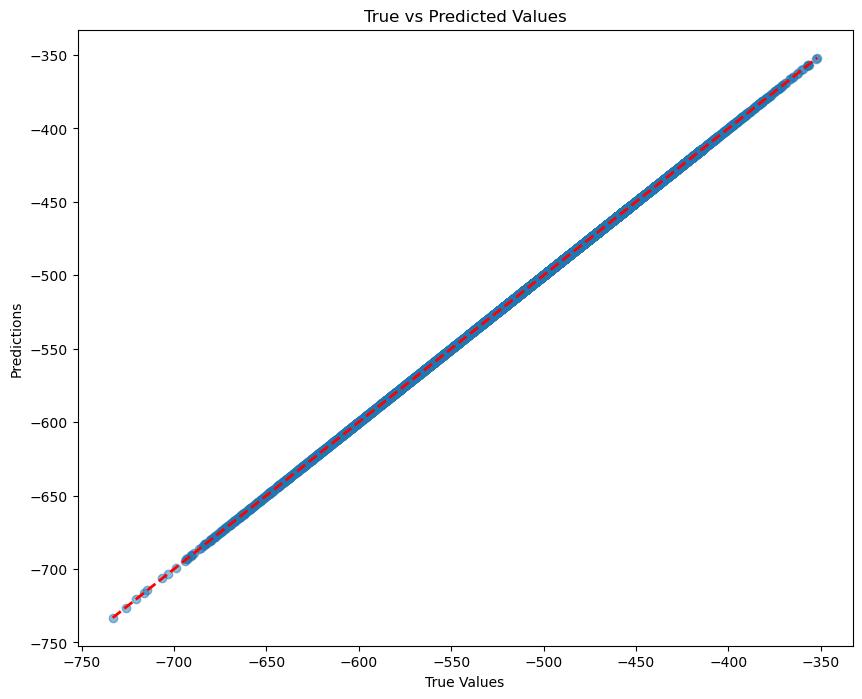

In [6]:
import matplotlib.pyplot as plt
# 绘制真实值 vs 预测值散点图
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

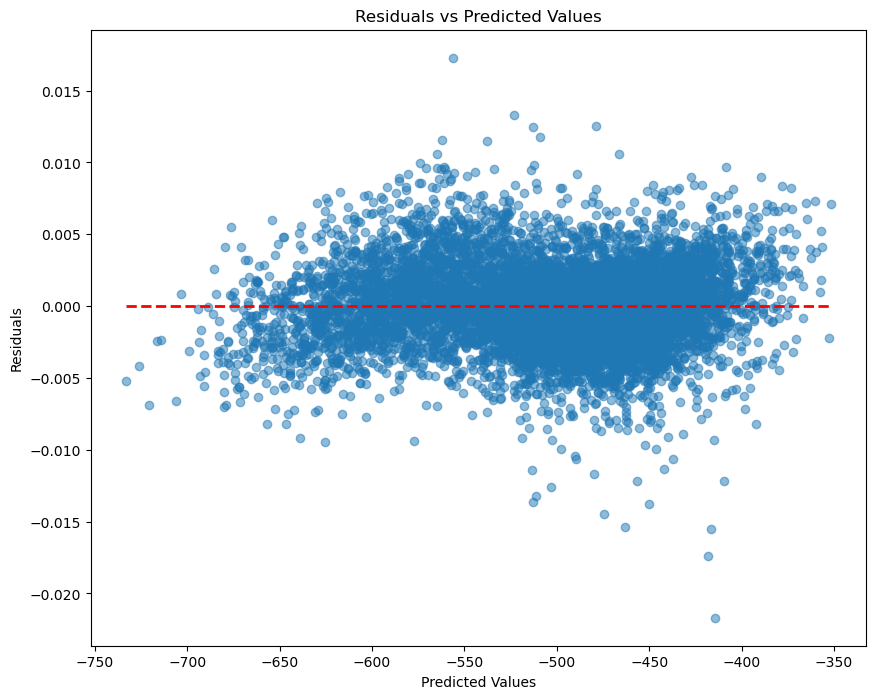

In [7]:
# 计算残差
residuals = y_test - y_pred_best

# 绘制残差图
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_best.min(), xmax=y_pred_best.max(), colors='r', linestyles='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [8]:
# 获取特征系数
coefs = elastic_net_best.coef_

# 创建一个DataFrame，将特征名称和对应的系数放在一起
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefs
})

# 按系数的绝对值大小排序，选出前10个特征
top_10_features = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# 输出前10个重要特征
print(top_10_features)

   Feature  Coefficient
5       x4     0.999618
7       x6     0.000349
24     x23    -0.000006
10      x9    -0.000005
53     x52    -0.000003
37     x36    -0.000002
29     x28    -0.000002
71     x70    -0.000001
88     x87    -0.000001
39     x38     0.000001


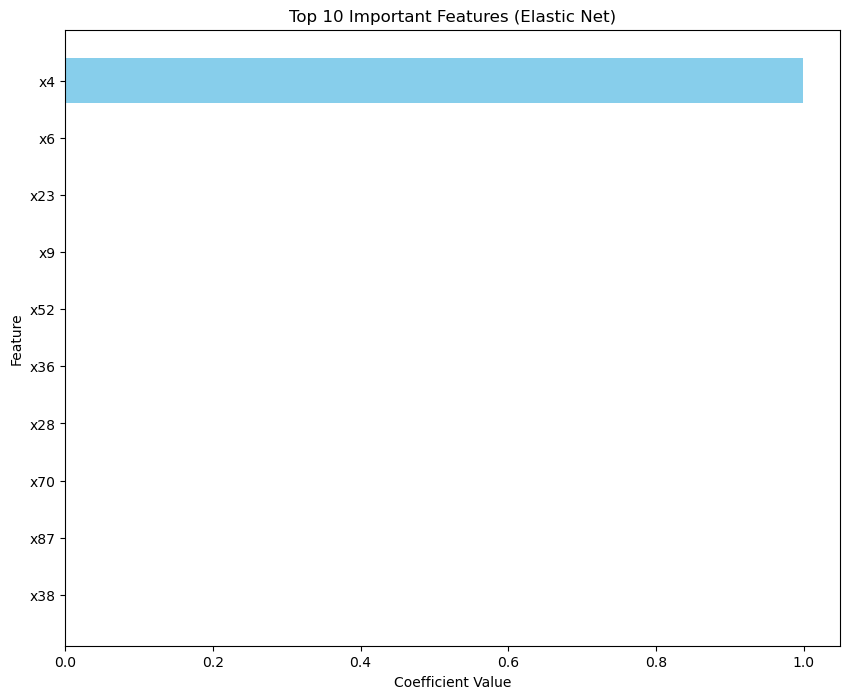

In [10]:
# 可视化前10个重要特征
plt.figure(figsize=(10, 8))
plt.barh(top_10_features['Feature'], top_10_features['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Elastic Net)")
plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在最上面
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = pd.Series(y)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

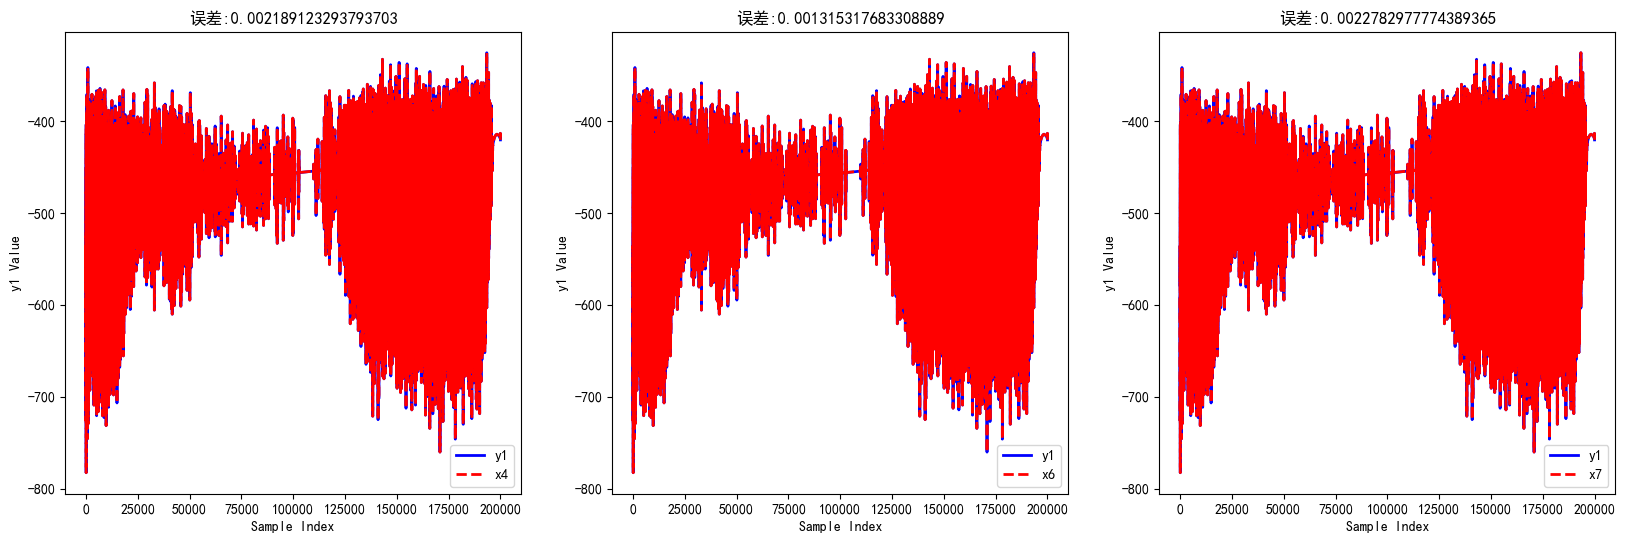

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'
# 计算并显示均方误差
mse4 = mean_squared_error(X['x4'], y)
mse6 = mean_squared_error(X['x6'], y)
mse7 = mean_squared_error(X['x7'], y)

plt.subplot(1,3,1)
plt.plot(y, label="y1",color="blue", linewidth=2)
plt.plot(X['x4'], label="x4", color="red", linestyle="--", linewidth=2)
plt.legend()
plt.title(f'误差:{mse4}')
plt.xlabel("Sample Index")
plt.ylabel("y1 Value")

plt.subplot(1,3,2)
plt.plot(y, label="y1", color="blue", linewidth=2)
plt.plot(X['x6'], label="x6", color="red", linestyle="--", linewidth=2)
plt.legend()
plt.title(f'误差:{mse6}')
plt.xlabel("Sample Index")
plt.ylabel("y1 Value")

plt.subplot(1,3,3)
plt.plot(y, label="y1",color="blue", linewidth=2)
plt.plot(X['x7'], label="x7",color="red", linestyle="--", linewidth=2)
plt.legend()
plt.title(f'误差:{mse7}')
plt.xlabel("Sample Index")
plt.ylabel("y1 Value")
plt.show()

In [3]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # 这里 alpha 是总的正则化强度，l1_ratio 控制 L1 和 L2 的比例
elastic_net.fit(X_train, y_train)

d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.919e+04, tolerance: 2.061e+04
  model = cd_fast.enet_coordinate_descent(


ElasticNet(random_state=42)

In [4]:
from sklearn.metrics import mean_squared_error
# 使用测试集进行预测
y_pred = elastic_net.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"测试集的均方误差: {mse}")

测试集的均方误差: 0.00023441629521447349


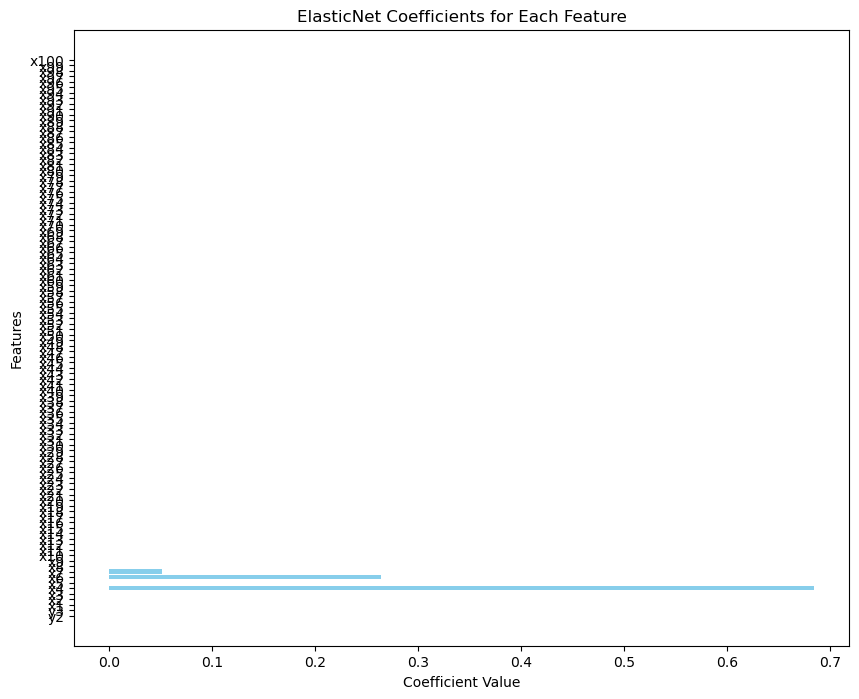

In [5]:
import matplotlib.pyplot as plt

# 获取特征名
feature_names = ['y2', 'y3'] + [f"x{i+1}" for i in range(X.shape[1]-2)]

# 绘制系数条形图
plt.figure(figsize=(10, 8))
plt.barh(feature_names, elastic_net.coef_, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('ElasticNet Coefficients for Each Feature')
plt.show()

In [7]:
import numpy as np

# 提取系数及对应的特征名称
coefficients = elastic_net.coef_
feature_names = [f"x{i+1}" for i in range(X.shape[1])]

# 将特征名称与系数组合在一起，并按系数大小排序
features_with_coefficients = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# 选择前10个重要特征
top_3_features = features_with_coefficients[:3]

# 打印前10个特征及其系数
print("前3个重要特征及其系数:")
for feature, coef in top_3_features:
    print(f"{feature}: {coef}")

前3个重要特征及其系数:
x6: 0.6846714107050679
x8: 0.2637057839908298
x9: 0.05113391150301932


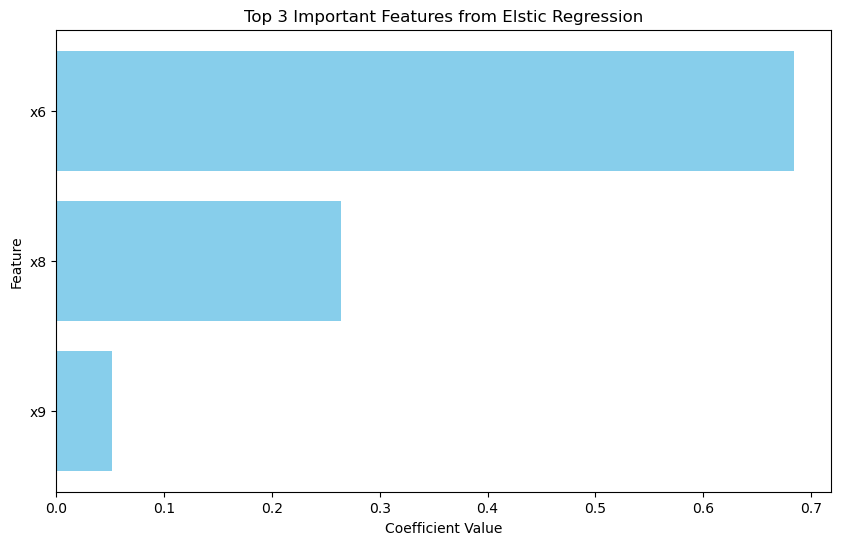

In [8]:
import matplotlib.pyplot as plt

# 分别提取特征名称和系数
top_3_feature_names = [f[0] for f in top_3_features]
top_3_coefficients = [f[1] for f in top_3_features]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.barh(top_3_feature_names, top_3_coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 3 Important Features from Elstic Regression")
plt.gca().invert_yaxis()  # 使得最重要的特征在最上方
plt.show()


In [7]:
# 构建方程字符串
equation_terms = [f"{coef} * {feature}" for feature, coef in top_3_features]
equation = " + ".join(equation_terms)
print(f"y1 = {equation}")

y1 = 0.6846714107050679 * x6 + 0.2637057839908298 * x8 + 0.05113391150301932 * x9


In [8]:
import matplotlib.pyplot as plt
# 根据 top_10_features 中的特征索引重新选择特征
top_3_feature_indices = [int(feature[1:])-1 for feature, _ in top_3_features]
X_train_top_3 = X_train.iloc[:, top_3_feature_indices]
X_test_top_3 = X_test.iloc[:, top_3_feature_indices]
X_top_3 = X.iloc[:, top_3_feature_indices]
# 重新训练模型
elastic_net1 = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net1.fit(X_train_top_3, y_train)
y_pred = elastic_net1.predict(X_top_3)

d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.919e+04, tolerance: 2.061e+04
  model = cd_fast.enet_coordinate_descent(


In [13]:
coefficients1 = elastic_net1.coef_
features_with_coefficient = sorted(zip(top_3_feature_names, coefficients1), key=lambda x: abs(x[1]), reverse=True)
# 打印前10个特征及其系数
print("前3个重要特征及其系数:")
for feature1, coef1 in features_with_coefficient:
    print(f"{feature1}: {coef1}")

前3个重要特征及其系数:
x6: 0.6847131803914085
x8: 0.2637208901079956
x9: 0.05113669198667607


In [14]:
equation_term = [f"{coef1} * {feature1}" for feature1, coef1 in features_with_coefficient]
equation1 = " + ".join(equation_term)
print(f"y1 = {equation1}")

y1 = 0.6847131803914085 * x6 + 0.2637208901079956 * x8 + 0.05113669198667607 * x9


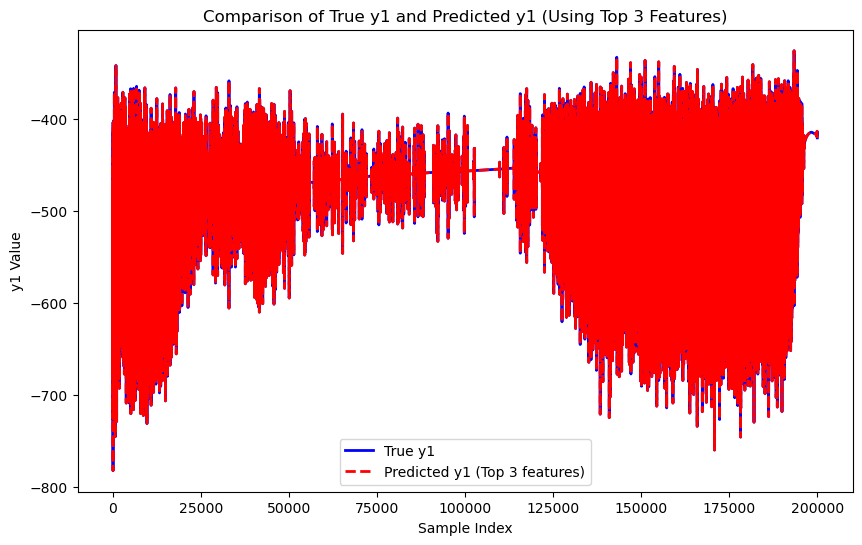

In [10]:
# 绘制原始的y2值曲线和预测曲线
plt.figure(figsize=(10, 6))
plt.plot(y, label="True y1", color="blue", linewidth=2)
plt.plot(y_pred, label="Predicted y1 (Top 3 features)", color="red", linestyle="--", linewidth=2)
plt.legend()
plt.title("Comparison of True y1 and Predicted y1 (Using Top 3 Features)")
plt.xlabel("Sample Index")
plt.ylabel("y1 Value")
plt.show()

In [15]:
# 计算并显示均方误差
mse_top_3 = mean_squared_error(y, y_pred)
print(f"使用前10个特征的预测结果的均方误差: {mse_top_3}")

使用前10个特征的预测结果的均方误差: 0.000216433523397959
